In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-38.68773317182686 -52.72156063711404
-55.80844569568484 -61.570370727284796
89.36575712684856 149.38399086095762
89.41387581628172 22.94354660056439
70.33971199007132 142.86956260741255
-0.056703948628211265 146.36725671307647
-31.944766806152415 -120.12983844420133
-11.125388421507154 95.05772142137391
-49.91215784947284 -142.0692396269038
55.684984290959875 81.63598914380748
-53.561661758941334 19.519305559101326
38.00261846081267 -101.38314117967985
22.76466076738366 56.907538283138564
-37.17935698791022 -93.94366467275529
70.1171862679085 -3.3719855870049855
79.53919432433426 110.17001721643294
-89.2126962046673 148.6369285877467
41.107581220822055 167.8783704121392
-65.46197734726529 -81.94526160356187
33.67941020973686 90.43507362782833
11.435851855070482 1.183320617438568
-59.03656321792266 30.31631138555869
-86.55957562957383 -107.0626223211297
-31.160936858254097 -104.90775911242598
78.36029980936672 -89.6674046129912
30.489165011782433 98.01642147270184
-73.29049023988883 -1

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [11]:
cities

['maldonado',
 'ushuaia',
 'chokurdakh',
 'longyearbyen',
 'deputatskiy',
 'lorengau',
 'rikitea',
 'bengkulu',
 'mataura',
 'chulym',
 'bredasdorp',
 'garden city',
 'nizwa',
 'lebu',
 'klaksvik',
 'saskylakh',
 'hobart',
 'nikolskoye',
 'punta arenas',
 'lasa',
 'diapaga',
 'port elizabeth',
 'qaanaaq',
 'tezu',
 'vaitupu',
 'porto novo',
 'carnarvon',
 'taolanaro',
 'busselton',
 'ponta do sol',
 'bac lieu',
 'chute-aux-outardes',
 'kavaratti',
 'dunedin',
 'vaini',
 'beloha',
 'moron',
 'ribeira grande',
 'port alfred',
 'cape town',
 'hermanus',
 'mar del plata',
 'khatanga',
 'hambantota',
 'batticaloa',
 'vaasa',
 'bambous virieux',
 'richards bay',
 'paka',
 'port blair',
 'nyakabindi',
 'caravelas',
 'avarua',
 'benidorm',
 'salinas',
 'college',
 'mendi',
 'clyde river',
 'karauzyak',
 'mahebourg',
 'pasni',
 'thompson',
 'inhambane',
 'atuona',
 'albany',
 'berlevag',
 'izyaslav',
 'pop',
 'illoqqortoormiut',
 'oksfjord',
 'bealanana',
 'tavda',
 'kahului',
 'esperance',
 'r

In [7]:
import requests
requests.__version__

'2.26.0'

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [16]:
# URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maldonado
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | deputatskiy
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | chulym
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | garden city
Processing Record 13 of Set 1 | nizwa
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | lasa
Processing Record 21 of Set 1 | diapaga
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | qaanaa

City not found. Skipping...
Processing Record 39 of Set 4 | arlit
Processing Record 40 of Set 4 | kuito
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | roma
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | gamboma
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | saint-joseph
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | yinchuan
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | gumdag
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | cookeville
Processing Record 5 of Set 5 | eureka
Processing Record 6 of Set 5 | bilma
Processing Record 7 of Set 5 | kiama
Processing Record 8 of Set 5 | atikokan
Processing Record 9 of Set 5 | chegdomyn
Processing Record 10 of Set 5 | udachnyy
Processing Record 11 of Set 5 | pirawa
Processing Record 12 of Set 5 | dolbeau
City not found. Skipping

Processing Record 25 of Set 8 | muroto
Processing Record 26 of Set 8 | sao gabriel da cachoeira
Processing Record 27 of Set 8 | puerto del rosario
Processing Record 28 of Set 8 | rocha
Processing Record 29 of Set 8 | angarsk
Processing Record 30 of Set 8 | grand-santi
Processing Record 31 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | petrivka
Processing Record 34 of Set 8 | beringovskiy
Processing Record 35 of Set 8 | zyryanka
Processing Record 36 of Set 8 | mount isa
Processing Record 37 of Set 8 | ginir
Processing Record 38 of Set 8 | la ronge
Processing Record 39 of Set 8 | nortelandia
Processing Record 40 of Set 8 | divo
Processing Record 41 of Set 8 | gushikawa
Processing Record 42 of Set 8 | omboue
Processing Record 43 of Set 8 | oyama
Processing Record 44 of Set 8 | pisco
Processing Record 45 of Set 8 | piranhas
Processing Record 46 of Set 8 | guiyang
Processing Record 47 of Set 8 | cortez
Processing Record 4

Processing Record 14 of Set 12 | ngunguru
Processing Record 15 of Set 12 | kharagauli
Processing Record 16 of Set 12 | bonavista
Processing Record 17 of Set 12 | aksarka
Processing Record 18 of Set 12 | flinders
Processing Record 19 of Set 12 | barinas
Processing Record 20 of Set 12 | camopi
Processing Record 21 of Set 12 | marcona
City not found. Skipping...
Processing Record 22 of Set 12 | haines junction
Processing Record 23 of Set 12 | caldas novas
Processing Record 24 of Set 12 | kemijarvi
Processing Record 25 of Set 12 | kuressaare
Processing Record 26 of Set 12 | boddam
Processing Record 27 of Set 12 | jiangkou
Processing Record 28 of Set 12 | barabai
Processing Record 29 of Set 12 | namibe
Processing Record 30 of Set 12 | poltavka
Processing Record 31 of Set 12 | kampot
Processing Record 32 of Set 12 | bud
Processing Record 33 of Set 12 | namie
Processing Record 34 of Set 12 | ankang
Processing Record 35 of Set 12 | roald
Processing Record 36 of Set 12 | palmer
Processing Recor

In [18]:
# Print the city_data count to confirm sufficient count.
len(city_data)

556

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maldonado,-34.6667,-54.9167,70.99,46,8,9.69,UY,2022-05-08 15:59:54
1,Ushuaia,-54.8000,-68.3000,40.66,87,75,35.68,AR,2022-05-08 15:58:44
2,Chokurdakh,70.6333,147.9167,8.04,92,99,6.53,RU,2022-05-08 15:58:40
3,Longyearbyen,78.2186,15.6401,17.85,71,18,16.24,SJ,2022-05-08 15:59:55
4,Deputatskiy,69.3000,139.9000,10.53,99,100,3.36,RU,2022-05-08 15:59:55
5,Lorengau,-2.0226,147.2712,83.37,74,92,13.62,PG,2022-05-08 15:59:56
6,Rikitea,-23.1203,-134.9692,76.51,80,42,21.25,PF,2022-05-08 15:59:56
7,Bengkulu,-3.8004,102.2655,78.42,82,95,4.03,ID,2022-05-08 15:55:19
8,Mataura,-46.1927,168.8643,47.48,98,92,0.98,NZ,2022-05-08 15:55:19
9,Chulym,55.0997,80.9572,39.54,79,61,2.89,RU,2022-05-08 15:59:57


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maldonado,UY,2022-05-08 15:59:54,-34.6667,-54.9167,70.99,46,8,9.69
1,Ushuaia,AR,2022-05-08 15:58:44,-54.8000,-68.3000,40.66,87,75,35.68
2,Chokurdakh,RU,2022-05-08 15:58:40,70.6333,147.9167,8.04,92,99,6.53
3,Longyearbyen,SJ,2022-05-08 15:59:55,78.2186,15.6401,17.85,71,18,16.24
4,Deputatskiy,RU,2022-05-08 15:59:55,69.3000,139.9000,10.53,99,100,3.36
...,...,...,...,...,...,...,...,...,...
551,Pakxan,LA,2022-05-08 16:17:04,18.3778,103.6601,76.64,79,86,3.06
552,Sur,OM,2022-05-08 16:17:05,22.5667,59.5289,88.75,50,0,2.46
553,Peniche,PT,2022-05-08 16:17:06,39.3558,-9.3811,79.29,61,69,11.27
554,Wanning,CN,2022-05-08 16:17:06,18.8003,110.3967,76.15,89,92,2.66


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

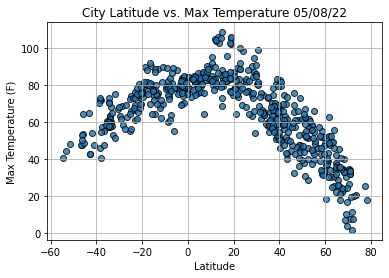

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

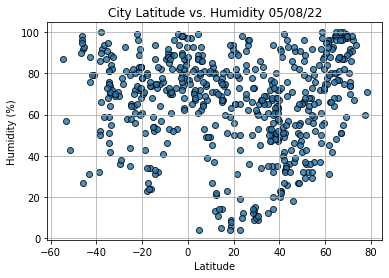

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

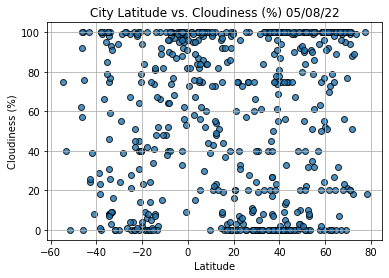

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

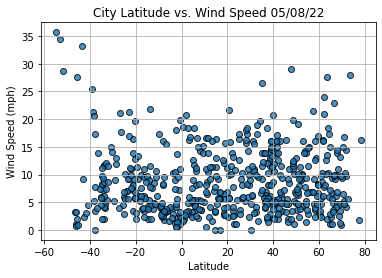

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()